In [1]:
import h5py
file_path = 'drive/MyDrive/final_dataset/features/fused/fused_features_2.h5'
def inspect_hdf5(file_path):
    try:
        with h5py.File(file_path, 'r') as f:
            print(f"Inspecting HDF5 file: {file_path}")
            print("="*50)

            print("Top-level structure:")
            def print_structure(name, obj):
                if isinstance(obj, h5py.Group):
                    print(f"Group: {name}")
                elif isinstance(obj, h5py.Dataset):
                    print(f"Dataset: {name} - Shape: {obj.shape} - Dtype: {obj.dtype}")

            f.visititems(print_structure)

            print("="*50)

            print("File Attributes:")
            for attr in f.attrs:
                print(f"{attr}: {f.attrs[attr]}")

            print("="*50)

            print("Preview of Datasets:")
            def preview_dataset(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(f"\nDataset: {name} - Shape: {obj.shape} - Dtype: {obj.dtype}")
                    print(f"First 5 entries: {obj[:5]}")

            f.visititems(preview_dataset)

    except Exception as e:
        print(f"Error inspecting HDF5 file: {e}")

inspect_hdf5(file_path)


Inspecting HDF5 file: drive/MyDrive/final_dataset/features/fused/fused_features_2.h5
Top-level structure:
Dataset: fused_fake_features - Shape: (967, 16, 1280) - Dtype: float32
Dataset: fused_real_features - Shape: (967, 48, 1280) - Dtype: float32
File Attributes:
Preview of Datasets:

Dataset: fused_fake_features - Shape: (967, 16, 1280) - Dtype: float32
First 5 entries: [[[ 0.01540729 -0.04765682 -0.04595506 ... -0.00823935 -0.00095613
   -0.06812273]
  [ 0.0153143  -0.04762641 -0.04596613 ... -0.00822124 -0.00101047
   -0.06812993]
  [ 0.0151509  -0.04780773 -0.04618119 ... -0.00839374 -0.0011356
   -0.06837457]
  ...
  [ 0.01536437 -0.04743315 -0.04590159 ... -0.00806938 -0.00098176
   -0.06794217]
  [ 0.01528729 -0.04743528 -0.04598815 ... -0.00809216 -0.00097488
   -0.06799898]
  [ 0.01532758 -0.04759153 -0.04591957 ... -0.00814309 -0.0010737
   -0.06797442]]

 [[ 0.01537021 -0.04737755 -0.04537702 ... -0.00810175 -0.00117367
   -0.06775736]
  [ 0.0154072  -0.04735136 -0.04542564

In [2]:
import h5py

def list_datasets(h5file):
    """
    Recursively lists all datasets in the HDF5 file.

    Parameters:
    h5file (h5py.File): Open HDF5 file object.

    Returns:
    None
    """
    def explore_group(group, path=""):
        for key in group.keys():
            item = group[key]
            full_path = f"{path}/{key}" if path else key
            if isinstance(item, h5py.Dataset):
                print(f"Dataset: {full_path}")
                print(f"  Shape: {item.shape}")
                print(f"  Dtype: {item.dtype}")
            elif isinstance(item, h5py.Group):
                explore_group(item, full_path)

    explore_group(h5file)

with h5py.File(file_path, 'r') as h5f:
    print("Datasets in the file:")
    list_datasets(h5f)


Datasets in the file:
Dataset: fused_fake_features
  Shape: (967, 16, 1280)
  Dtype: float32
Dataset: fused_real_features
  Shape: (967, 48, 1280)
  Dtype: float32


In [4]:

with h5py.File(file_path, 'r') as h5f:
    fake_features = h5f['fused_fake_features'][:]
    real_features = h5f['fused_real_features'][:]

    print("Fake Features Example:", fake_features[0, 0, :5])  # First 5 values of the first temporal step
    print("Real Features Example:", real_features[0, 0, :5])  # Same for real


Fake Features Example: [ 0.01540729 -0.04765682 -0.04595506  0.00290187  0.00493025]
Real Features Example: [ 0.01515575 -0.04767504 -0.0449465   0.00277022  0.004285  ]


In [5]:
import numpy as np

print("Fake Features Stats:")
print("  Mean:", np.mean(fake_features))
print("  Std Dev:", np.std(fake_features))
print("  Min:", np.min(fake_features))
print("  Max:", np.max(fake_features))

print("Real Features Stats:")
print("  Mean:", np.mean(real_features))
print("  Std Dev:", np.std(real_features))
print("  Min:", np.min(real_features))
print("  Max:", np.max(real_features))


Fake Features Stats:
  Mean: -0.025714366
  Std Dev: 0.026470216
  Min: -0.12581842
  Max: 0.058005176
Real Features Stats:
  Mean: -0.02557558
  Std Dev: 0.026551293
  Min: -0.12594852
  Max: 0.058584154


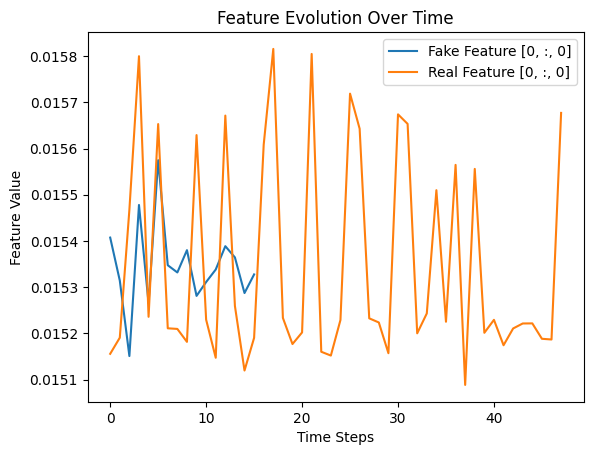

In [6]:
import matplotlib.pyplot as plt

plt.plot(fake_features[0, :, 0], label="Fake Feature [0, :, 0]")
plt.plot(real_features[0, :, 0], label="Real Feature [0, :, 0]")
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Feature Value")
plt.title("Feature Evolution Over Time")
plt.show()
